In [1]:
from brainflow.data_filter import DataFilter 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 

In [2]:
# Define the input file path
input_file = "/Applications/TradingBot/Webscraper/SoccerSharp/wedidathink/src/eeg_data_test.csv"

# Check if the file exists
if not os.path.exists(input_file):
    raise FileNotFoundError(f"The file '{input_file}' was not found. Ensure the main script ran successfully.")

print(f"File found: {input_file}")


File found: /Applications/TradingBot/Webscraper/SoccerSharp/wedidathink/src/eeg_data_test.csv


In [3]:
# Load EEG data from the file
eeg_data = DataFilter.read_file(input_file)
eeg_data = np.array(eeg_data)
print("EEG Data Loaded:", eeg_data.shape)


EEG Data Loaded: (4, 15288)


In [4]:
def analyze_brainwave_activity(data, steady_threshold=5.0, fluctuation_threshold=50.0):
    results = []
    for channel_idx in range(data.shape[0]):
        channel_data = data[channel_idx]
        steady_segments = []
        fluctuation_comments = []

        # Analyze steady periods
        start_idx = 0
        for i in range(1, len(channel_data)):
            diff = abs(channel_data[i] - channel_data[i - 1])
            if diff > steady_threshold:
                if i - 1 > start_idx:
                    steady_segments.append((start_idx, i - 1))
                start_idx = i

        # Handle the last segment
        if start_idx < len(channel_data) - 1:
            steady_segments.append((start_idx, len(channel_data) - 1))

        # Analyze large fluctuations
        for i in range(1, len(channel_data)):
            diff = abs(channel_data[i] - channel_data[i - 1])
            if diff > fluctuation_threshold:
                fluctuation_comments.append(
                    f"Channel {channel_idx + 1}: Huge fluctuation from {channel_data[i - 1]:.2f} µV to {channel_data[i]:.2f} µV at sample {i}."
                )

        # Store results
        results.append({
            "channel": channel_idx + 1,
            "steady_segments": steady_segments,
            "fluctuations": fluctuation_comments,
        })

    return results

# Analyze EEG data
analysis_results = analyze_brainwave_activity(eeg_data)


In [5]:
steady_segments_df = pd.DataFrame([
    {"channel": r["channel"], "start": s[0], "end": s[1]}
    for r in analysis_results for s in r["steady_segments"]
])
fluctuation_comments_df = pd.DataFrame([
    {"channel": r["channel"], "comment": c}
    for r in analysis_results for c in r["fluctuations"]
])

# Display results
print("Steady Segments:")
display(steady_segments_df)

print("Fluctuation Comments:")
display(fluctuation_comments_df)


Steady Segments:


,channel,start,end
0,1,2,3
1,1,12,13
2,1,14,15
3,1,25,26
4,1,29,30
...,...,...,...
11204,4,15272,15273
11205,4,15274,15275
11206,4,15278,15279
11207,4,15281,15282


Fluctuation Comments:


,channel,comment
0,1,Channel 1: Huge fluctuation from 41.02 µV to -...
1,1,Channel 1: Huge fluctuation from 3.42 µV to 58...
2,1,Channel 1: Huge fluctuation from 37.60 µV to -...
3,1,Channel 1: Huge fluctuation from 74.22 µV to 2...
4,1,Channel 1: Huge fluctuation from 90.82 µV to 2...
...,...,...
357,4,Channel 4: Huge fluctuation from -171.39 µV to...
358,4,Channel 4: Huge fluctuation from -50.78 µV to ...
359,4,Channel 4: Huge fluctuation from -49.32 µV to ...
360,4,Channel 4: Huge fluctuation from -152.34 µV to...


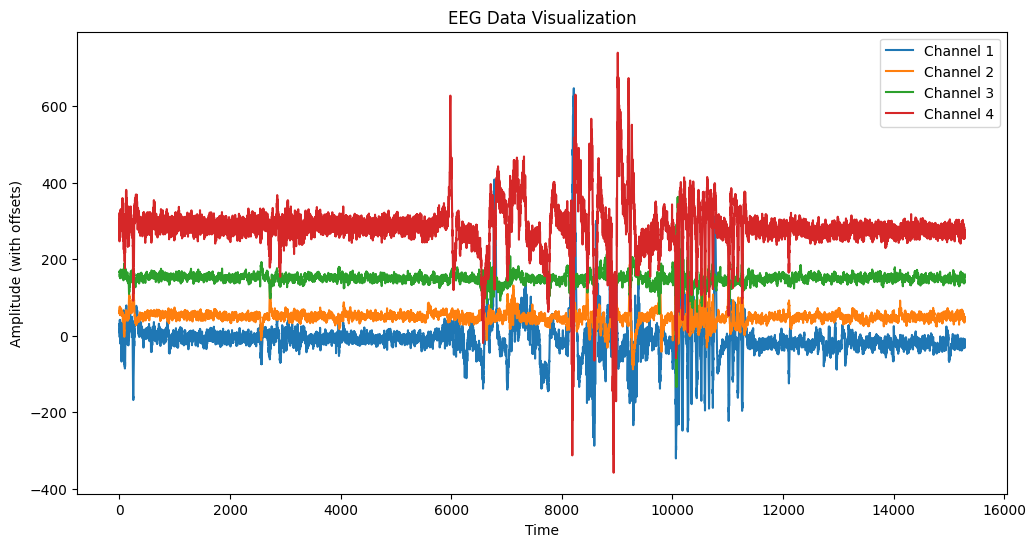

In [6]:
# Visualize EEG data with offsets for clarity
offsets = [i * 100 for i in range(eeg_data.shape[0])]  # Offset each channel
plt.figure(figsize=(12, 6))
for i in range(eeg_data.shape[0]):
    plt.plot(np.arange(eeg_data.shape[1]), eeg_data[i] + offsets[i], label=f"Channel {i+1}")

plt.xlabel('Time')
plt.ylabel('Amplitude (with offsets)')
plt.legend()
plt.title('EEG Data Visualization')
plt.show()
